In [60]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
carpeta = "salida"
archivos = os.listdir(carpeta)
archivos

['n16.dat',
 'n2.csv',
 'n8.csv',
 'n22.dat',
 'n16.csv',
 'n8.dat',
 'n2.dat',
 'n4.dat',
 'n22.csv',
 'n4.csv']

In [62]:
archivos = [i for i in archivos if "dat" in i]
lista = [[i.split(sep='.')[0].split(sep='n')[-1], i] for i in archivos]

lista

[['16', 'n16.dat'],
 ['22', 'n22.dat'],
 ['8', 'n8.dat'],
 ['2', 'n2.dat'],
 ['4', 'n4.dat']]

In [63]:
for i in lista:
    with open(carpeta+"/"+i[1], "r") as archi:
        lineas = archi.readlines()

    lineasCsv = []
    start = False
    for linea in lineas:
        if start:
            lineasCsv.append(linea)
        else:
            if "Broadcast" in linea:
                start = True
                lineasCsv.append(linea)
    
    with open(carpeta+"/"+i[1].split(sep=".")[0]+".csv", "w") as archi:
        archi.writelines(lineasCsv)
        archi.flush()

    i[1] = i[1].split(sep=".")[0]+".csv"

In [64]:
dfGeneral = pd.DataFrame(columns=["Broadcast", "Tiempo", "Nro Procesadores"])
for i in lista:
    df = pd.read_csv(carpeta+"/"+i[1])
    dfGeneral = pd.concat([dfGeneral, df])
    # for _, row in df.iterrows():
    #     # dfGeneral = dfGeneral.append(row, ignore_index=True)
    #     dfGeneral = pd.concat([dfGeneral, pd.DataFrame(row, index=[0])], ignore_index=True)


In [65]:
dfGeneral = dfGeneral.sort_values(by="Nro Procesadores")
dfGeneral

,Broadcast,Tiempo,Nro Procesadores
0,Punto a punto,0.149922,2
1,Arbol,0.126187,2
2,MPICH,0.128695,2
0,Punto a punto,0.447509,4
1,Arbol,0.260883,4
2,MPICH,0.133660,4
0,Punto a punto,1.035972,8
1,Arbol,0.391319,8
2,MPICH,0.139094,8
0,Punto a punto,2.201967,16


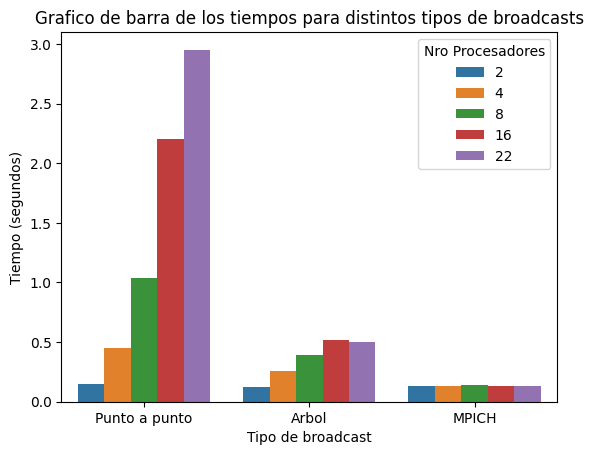

In [69]:
sns.barplot(dfGeneral, x="Broadcast", y="Tiempo", hue="Nro Procesadores")
plt.xlabel("Tipo de broadcast")
plt.ylabel("Tiempo (segundos)")
plt.title("Grafico de barra de los tiempos para distintos tipos de broadcasts")
plt.savefig("salida/salida.png")
plt.show()